**Made using assistance from GenAI Tools.**

In [11]:
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
import time, ast, csv, re
import pandas as pd

Importing csv file with graph data which is randomly generated.

In [18]:
text_files = ["graph_data_10_edges.txt", "graph_data_20_edges.txt", "graph_data_30_edges.txt", "graph_data_40_edges.txt"]
dfs = []
for file in text_files:
  with open(file, "r") as f:
    edges = [ast.literal_eval(line.strip()) for line in f]

  num_edges = int(file.split("_")[2])
  df = pd.DataFrame({"Edges": edges, "Number of Edges":num_edges})

  dfs.append(df)

graph_data = pd.concat(dfs, ignore_index=True)
display(graph_data)

,Edges,Number of Edges
0,"(1, 9)",10
1,"(1, 3)",10
2,"(2, 5)",10
3,"(3, 5)",10
4,"(4, 8)",10
...,...,...
95,"(7, 8)",40
96,"(7, 10)",40
97,"(8, 10)",40
98,"(8, 9)",40


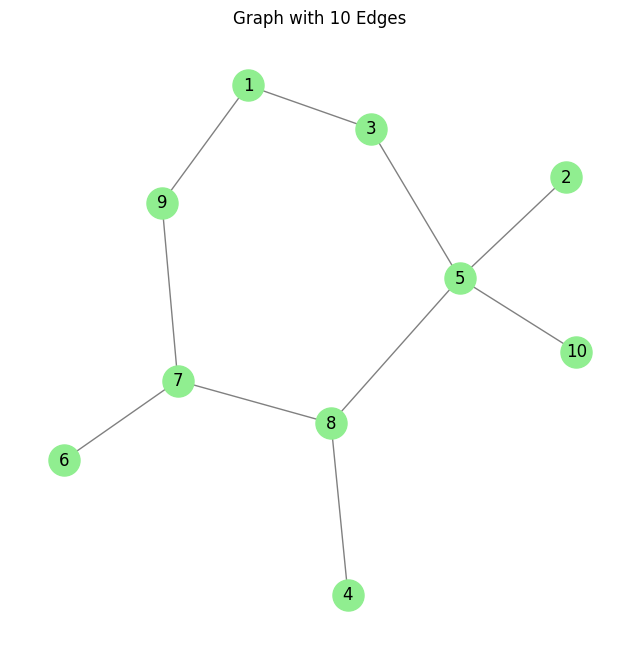

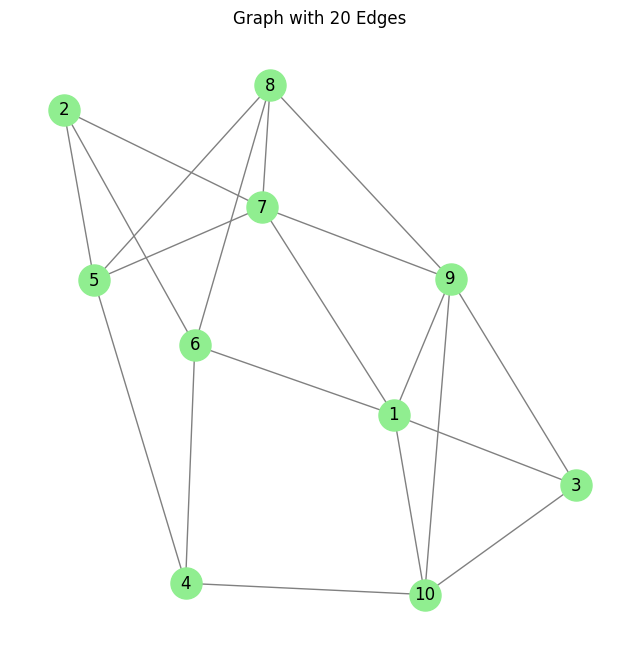

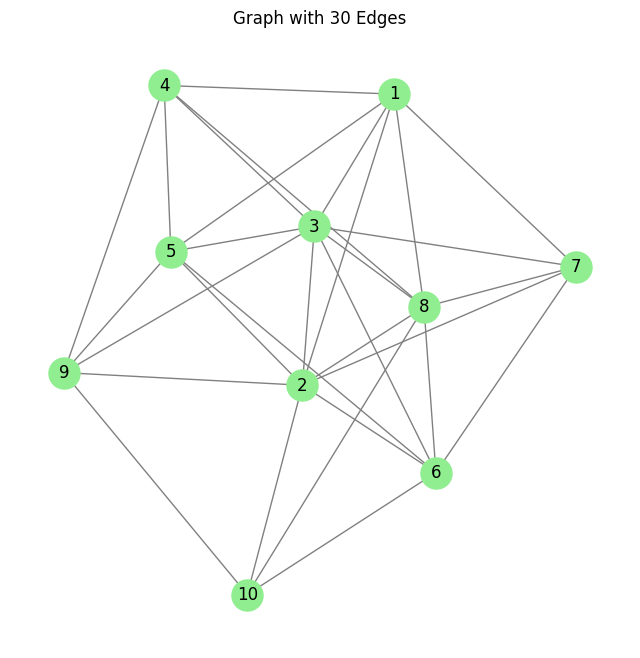

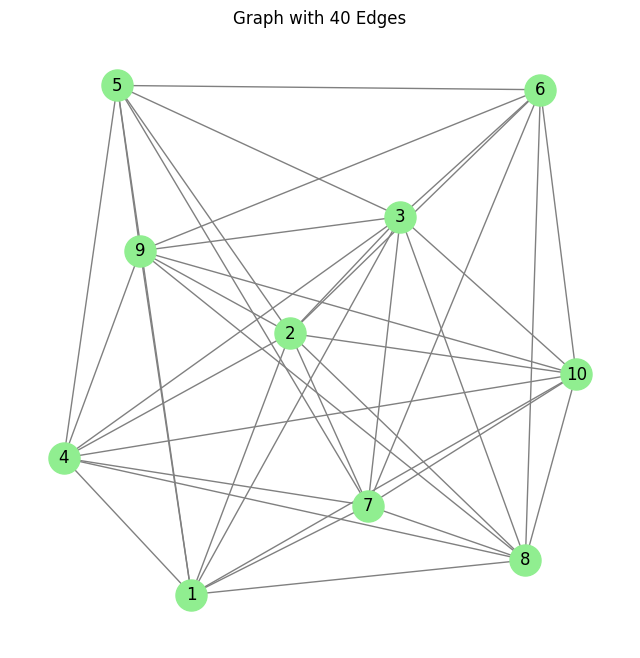

In [22]:
graphs = {}
num_vertices = 10 # n = 10 for m = 10, 20, 30, and 40
for num_edges, group in graph_data.groupby("Number of Edges"):
    G = nx.Graph()
    G.add_nodes_from(range(1, num_vertices + 1)) # adding fixed nodes from 1 to 10

    for edge in group["Edges"]:
      G.add_edge(*edge)

    graphs[num_edges] = G

for num_edges, G in graphs.items():
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw(G, with_labels=True, ax=ax, node_size=500, node_color='lightgreen', edge_color='gray')
    ax.set_title(f"Graph with {num_edges} Edges")
    plt.show()
    print("\n")

Using ChatGPT, tracking the time it took to find each vertex cover and improved on Brute Force Algorithm for finding it

In [39]:
minimum_vertex_covers = {}
timing_results = {}

num_vertices = 10 # n = 10 for m = 10, 20, 30, and 40

for num_edges, graph in graphs.items():
    edges = list(graph.edges())
    start_time = time.time() # tracking time taken to find vertex cover as m increases

    for k in range(1, num_vertices + 1):
        covers_of_size_k = []
        for subset in combinations(graph.nodes(), k): # iterating through every subset of the number of vertices to find the minimum cover
            is_vertex_cover = True
            for u, v in edges:
                if u not in subset and v not in subset:
                    is_vertex_cover = False
                    break
            if is_vertex_cover:
                covers_of_size_k.append(subset)

        if covers_of_size_k:
            break # Break out of the loop for k since we found the minimum size

    minimum_vertex_covers[num_edges] = covers_of_size_k
    end_time = time.time() # End timing
    timing_results[num_edges] = end_time - start_time

if not minimum_vertex_covers:
    print("No minimum vertex cover found for any graph.")
else:
    print("Minimum Vertex Covers:")
    for num_edges, cover_list in minimum_vertex_covers.items():
        print(f"Graph with {num_edges} edges:")
        for cover in cover_list:
             print(f"  Cover: {cover} Size: {len(cover)}")


print("\nTime taken to calculate Minimum Vertex Cover:")
for num_edges, elapsed_time in timing_results.items():
    print(f"Graph with {num_edges} edges: {elapsed_time:.6f} seconds")

Minimum Vertex Covers:
Graph with 10 edges:
  Cover: (1, 4, 5, 7) Size: 4
  Cover: (1, 5, 7, 8) Size: 4
Graph with 20 edges:
  Cover: (1, 5, 6, 7, 9, 10) Size: 6
  Cover: (3, 5, 6, 7, 9, 10) Size: 6
Graph with 30 edges:
  Cover: (1, 2, 3, 4, 6, 8, 9) Size: 7
  Cover: (1, 2, 3, 5, 6, 8, 9) Size: 7
  Cover: (2, 3, 4, 5, 7, 8, 10) Size: 7
Graph with 40 edges:
  Cover: (1, 2, 3, 4, 5, 6, 8, 10) Size: 8
  Cover: (1, 2, 3, 4, 6, 7, 8, 9) Size: 8
  Cover: (1, 2, 3, 4, 6, 7, 9, 10) Size: 8
  Cover: (1, 2, 3, 5, 7, 8, 9, 10) Size: 8
  Cover: (2, 3, 4, 5, 7, 8, 9, 10) Size: 8

Time taken to calculate Minimum Vertex Cover:
Graph with 10 edges: 0.000252 seconds
Graph with 20 edges: 0.000788 seconds
Graph with 30 edges: 0.001092 seconds
Graph with 40 edges: 0.002080 seconds


Gemini to plot times

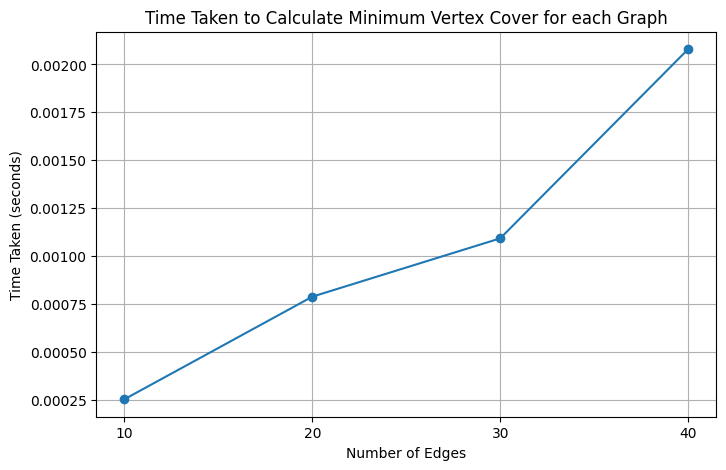

In [40]:
# Sort the results by the number of edges for a clear plot
sorted_num_edges = sorted(timing_results.keys())
sorted_times = [timing_results[num_edges] for num_edges in sorted_num_edges]
plt.figure(figsize=(8, 5))
plt.plot(sorted_num_edges, sorted_times, marker='o', linestyle='-')
plt.title('Time Taken to Calculate Minimum Vertex Cover for each Graph')
plt.xlabel('Number of Edges')
plt.ylabel('Time Taken (seconds)')
plt.grid(True)
plt.xticks(sorted_num_edges)
plt.show()

In [41]:
output_csv_path = 'vertex_cover_results.csv'

with open(output_csv_path, 'w', newline='') as csvfile:
    fieldnames = ['num_edges', 'vertex_cover', 'cover_size','time_taken']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()

    for num_edges, cover in minimum_vertex_covers.items():
        writer.writerow({'num_edges': num_edges,'vertex_cover': list(cover), 'cover_size': len(cover), 'time_taken': timing_results[num_edges]})

print(f"Vertex cover results saved to {output_csv_path}")

Vertex cover results saved to vertex_cover_results.csv
